### Importing the Data Analysis Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

### Importing the Machine Learning Libraries

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

### Data Analysis using Pandas

In [6]:
df = pd.read_csv("Bengaluru_House_DataC.csv")

In [7]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
areagrpby = df.groupby('area_type')['area_type'].agg("count")
areagrpby

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [12]:
df.drop(['area_type', 'society', 'balcony', 'availability'], axis = "columns",inplace=True )

In [13]:
df.dropna(inplace=True)

In [14]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [15]:
df["BHK"] = df["size"].apply(lambda x:int(x.split(" ")[0]))

In [16]:
df

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [17]:
df.drop("size", axis=1, inplace=True)

In [18]:
def issa_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df[~df["total_sqft"].apply(issa_float)].head(15)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [20]:
def isitsplit(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
df["total_sqft"] = df["total_sqft"].apply(isitsplit)

In [22]:
df.head(35)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [23]:
df.head(5)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [24]:
df.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [25]:
df.dropna(inplace = True)

In [26]:
df.shape

(13200, 5)

In [27]:
df = df.copy()
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"]

In [28]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [29]:
df["price_per_sqft"] = round(df["price_per_sqft"],2)

In [30]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00


In [31]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [32]:
len(location_stats[location_stats<=10])

1047

In [33]:
location_stats_less10 = location_stats[location_stats<=10]
location_stats_less10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [34]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less10 else x)
len(df.location.unique())

241

In [35]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00


In [36]:
df[df.total_sqft/df.BHK<300].head()

,location,total_sqft,bath,price,BHK,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.30
70,other,500.0,3.0,100.0,3,20000.00


In [37]:
df = df[~(df.total_sqft/df.BHK<300)] 
df.shape

(12456, 6)

In [38]:
def pps(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
df = pps(df)
df.shape

(10242, 6)

In [39]:
df.head(5)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.81


### Data Vizualsation

In [40]:
def plt_scatter(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='red',label='2BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='blue',label='3BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (in Lakhs INR)")
    plt.title(location)
    plt.legend()

    

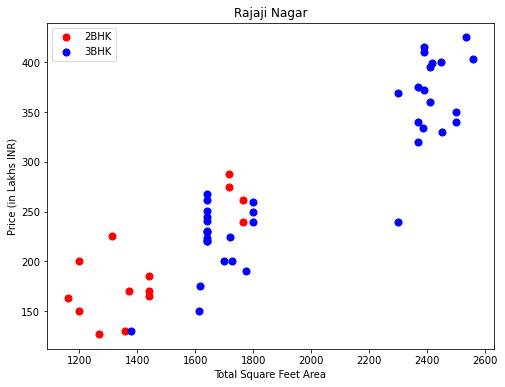

In [41]:
plt_scatter(df,"Rajaji Nagar")

Text(0, 0.5, 'Total Count')

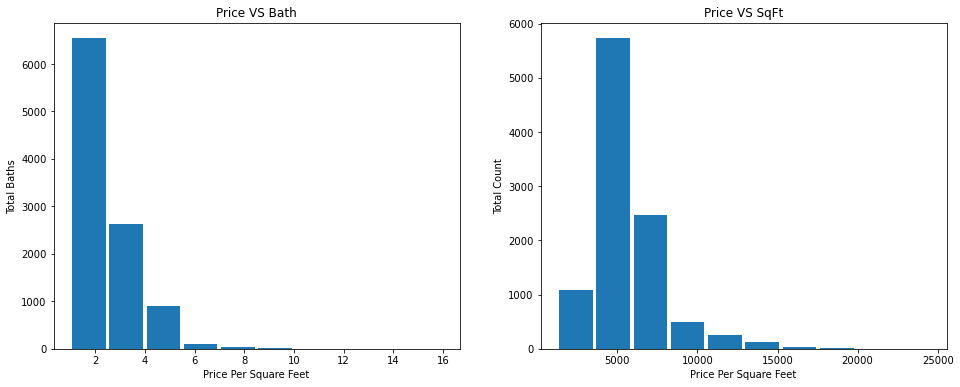

In [42]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.hist(df.bath,rwidth=0.9)
plt.title("Price VS Bath")
plt.xlabel("Price Per Square Feet")
plt.ylabel("Total Baths")

plt.subplot(1, 2, 2) # index 2
plt.hist(df.price_per_sqft,rwidth=0.9)
plt.title("Price VS SqFt")
plt.xlabel("Price Per Square Feet")
plt.ylabel("Total Count")

### Encoding

In [43]:
hotencode =  pd.get_dummies(df.location)
hotencode.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df = pd.concat([df,hotencode.drop('other',axis='columns')],axis='columns')
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.54,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.84,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.33,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.33,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.81,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df = df.drop('location', axis='columns')
df.head()

,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,15017.54,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,11901.84,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,12533.33,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,10833.33,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,11983.81,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X = df.drop(['price','price_per_sqft'], axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y = df.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [48]:
print("X Shape is {}".format(X.shape))
print("y Shape is {}".format(y.shape))


X Shape is (10242, 243)
y Shape is (10242,)


In [49]:
### Model

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [51]:
lnr = LinearRegression()

In [52]:
lnr.fit(X_train,y_train)

LinearRegression()

In [53]:
lnr.score(X_test,y_test)

0.787932494979487

In [54]:
cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.7676181 , 0.75853586, 0.81073027, 0.7748245 , 0.79757606])

In [66]:
def apt_model_GSV(X,y):
    algo = {
        'linear_regression': {
            'model':LinearRegression(),
            'params':{
                'normalize' :[True,False]   
            }
        },
        'lasso': {
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection' :['random','cyclic']   
            }
        },
        'decision_tree': {
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion' :['mse','friedman_mse'],
                'splitter' :['best','random']
            }
        }    
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algo.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    

In [67]:
apt_model_GSV(X,y)

,model,best_score,best_params
0,linear_regression,0.781857,{'normalize': False}
1,lasso,0.655916,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.677251,"{'criterion': 'mse', 'splitter': 'random'}"


### Test

In [72]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index] = 1
        
    return lnr.predict([x])[0]

In [74]:
df.head(3)

,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,15017.54,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,11901.84,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,12533.33,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
round(predict_price('2nd Stage Nagarbhavi',2000,3,3),2)

259.12